In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('WorkoutExport.csv')
df.head()

,Date,Exercise,Reps,Weight(kg),Duration(s),Distance(m),Incline,Resistance,isWarmup,Note,multiplier
0,2020-10-13 00:10:34 +0000,Walking,0,0.000000,1412.427958,1874.816007,0.0,0.0,False,NaN,0.0
1,2020-10-12 22:57:54 +0000,Cable Row,10,47.627255,0.000000,0.000000,0.0,0.0,True,NaN,1.0
2,2020-10-12 22:57:54 +0000,Cable Row,10,58.967078,0.000000,0.000000,0.0,0.0,False,NaN,1.0
3,2020-10-12 22:57:54 +0000,Cable Row,10,63.503007,0.000000,0.000000,0.0,0.0,False,NaN,1.0
4,2020-10-12 22:57:54 +0000,Cable Row,7,65.770972,0.000000,0.000000,0.0,0.0,False,NaN,1.0


In [3]:
df = df.groupby(['Exercise']).apply(lambda x: x)
df.head()

,Date,Exercise,Reps,Weight(kg),Duration(s),Distance(m),Incline,Resistance,isWarmup,Note,multiplier
0,2020-10-13 00:10:34 +0000,Walking,0,0.000000,1412.427958,1874.816007,0.0,0.0,False,NaN,0.0
1,2020-10-12 22:57:54 +0000,Cable Row,10,47.627255,0.000000,0.000000,0.0,0.0,True,NaN,1.0
2,2020-10-12 22:57:54 +0000,Cable Row,10,58.967078,0.000000,0.000000,0.0,0.0,False,NaN,1.0
3,2020-10-12 22:57:54 +0000,Cable Row,10,63.503007,0.000000,0.000000,0.0,0.0,False,NaN,1.0
4,2020-10-12 22:57:54 +0000,Cable Row,7,65.770972,0.000000,0.000000,0.0,0.0,False,NaN,1.0


In [4]:
# convert kilograms to pounds
df['Weight(kg)'] = df['Weight(kg)'].apply(lambda x: x * 2.204)
df.rename(columns={'Weight(kg)': 'Weight(lbs)'}, inplace=True)
df.head()

,Date,Exercise,Reps,Weight(lbs),Duration(s),Distance(m),Incline,Resistance,isWarmup,Note,multiplier
0,2020-10-13 00:10:34 +0000,Walking,0,0.000000,1412.427958,1874.816007,0.0,0.0,False,NaN,0.0
1,2020-10-12 22:57:54 +0000,Cable Row,10,104.970471,0.000000,0.000000,0.0,0.0,True,NaN,1.0
2,2020-10-12 22:57:54 +0000,Cable Row,10,129.963440,0.000000,0.000000,0.0,0.0,False,NaN,1.0
3,2020-10-12 22:57:54 +0000,Cable Row,10,139.960628,0.000000,0.000000,0.0,0.0,False,NaN,1.0
4,2020-10-12 22:57:54 +0000,Cable Row,7,144.959222,0.000000,0.000000,0.0,0.0,False,NaN,1.0


In [5]:
# create "Volume" feature
df['Volume'] = df['Reps'] * df['Weight(lbs)'] * df['multiplier']
df.head()

,Date,Exercise,Reps,Weight(lbs),Duration(s),Distance(m),Incline,Resistance,isWarmup,Note,multiplier,Volume
0,2020-10-13 00:10:34 +0000,Walking,0,0.000000,1412.427958,1874.816007,0.0,0.0,False,NaN,0.0,0.000000
1,2020-10-12 22:57:54 +0000,Cable Row,10,104.970471,0.000000,0.000000,0.0,0.0,True,NaN,1.0,1049.704711
2,2020-10-12 22:57:54 +0000,Cable Row,10,129.963440,0.000000,0.000000,0.0,0.0,False,NaN,1.0,1299.634404
3,2020-10-12 22:57:54 +0000,Cable Row,10,139.960628,0.000000,0.000000,0.0,0.0,False,NaN,1.0,1399.606281
4,2020-10-12 22:57:54 +0000,Cable Row,7,144.959222,0.000000,0.000000,0.0,0.0,False,NaN,1.0,1014.714554


In [6]:
# drop unwanted features (only concerned with weight training)
df.drop(columns=['isWarmup', 'Note', 'Distance(m)', 'Duration(s)'], inplace=True)
df.head()

,Date,Exercise,Reps,Weight(lbs),Incline,Resistance,multiplier,Volume
0,2020-10-13 00:10:34 +0000,Walking,0,0.000000,0.0,0.0,0.0,0.000000
1,2020-10-12 22:57:54 +0000,Cable Row,10,104.970471,0.0,0.0,1.0,1049.704711
2,2020-10-12 22:57:54 +0000,Cable Row,10,129.963440,0.0,0.0,1.0,1299.634404
3,2020-10-12 22:57:54 +0000,Cable Row,10,139.960628,0.0,0.0,1.0,1399.606281
4,2020-10-12 22:57:54 +0000,Cable Row,7,144.959222,0.0,0.0,1.0,1014.714554


In [7]:
# list all excecises, then select only the ones I want to analyze
df['Exercise'].value_counts()[0:35].index #for now I'll take the top 20

Index(['Cable Row', 'Dumbbell Shrug', 'Dumbbell Front Raise', 'Barbell Curl',
       'Dumbbell Shoulder Press', 'Cable Lateral Raise', 'Hiking',
       'Dumbbell Bench Press', 'Hammer Curls', 'Barbell Bench Press',
       'Cable Bicep Curl', 'Dumbbell Tricep Extension',
       'Single Arm Cable Crossover', 'Cable Tricep Extension',
       'Single Arm Dumbbell Tricep Extension', 'Cable Rope Tricep Extension',
       'Incline Dumbbell Squeeze Press', 'Dumbbell Incline Bench Press',
       'Handle Band Bicep Curl', 'V-Bar Pulldown', 'Cable Chest Press',
       'Low Cable Chest Fly', 'Single Arm Lat Pulldown',
       'Single Arm Cable Bicep Curl', 'Handle Band Tricep Extension',
       'Dumbbell Bicep Curl', 'Lat Pulldown', 'Rowing', 'Leg Extension',
       'Bent Over Barbell Row', 'Handle Band Reverse Curl', 'Push Up',
       'Jump Rope', 'Pull Up', 'Leg Press'],
      dtype='object')

In [8]:
exercises = ['Dumbbell Shrug', 'Cable Row', 'Dumbbell Front Raise', 'Barbell Curl',
     'Dumbbell Shoulder Press', 'Barbell Bench Press',
       'Dumbbell Tricep Extension', 'Dumbbell Bench Press',
       'Cable Lateral Raise', 'Hammer Curls', 'Cable Tricep Extension',
       'Cable Bicep Curl', 'Dumbbell Incline Bench Press',
       'Single Arm Cable Crossover', 'Single Arm Dumbbell Tricep Extension',
       'Cable Rope Tricep Extension',
       'Incline Dumbbell Squeeze Press',
       'Low Cable Chest Fly', 'Dumbbell Bicep Curl', 'Cable Chest Press',
       'V-Bar Pulldown', 'Lat Pulldown', 'Single Arm Lat Pulldown', 'Rowing',
       'Leg Extension',
       'Bent Over Barbell Row', 'Pull Up',
       'Single Arm Cable Bicep Curl', 'EZ-Bar Curl']
df = df[df['Exercise'].apply(lambda x: x in exercises)]
df.head()

,Date,Exercise,Reps,Weight(lbs),Incline,Resistance,multiplier,Volume
1,2020-10-12 22:57:54 +0000,Cable Row,10,104.970471,0.0,0.0,1.0,1049.704711
2,2020-10-12 22:57:54 +0000,Cable Row,10,129.963440,0.0,0.0,1.0,1299.634404
3,2020-10-12 22:57:54 +0000,Cable Row,10,139.960628,0.0,0.0,1.0,1399.606281
4,2020-10-12 22:57:54 +0000,Cable Row,7,144.959222,0.0,0.0,1.0,1014.714554
5,2020-10-12 22:57:54 +0000,Cable Row,5,144.959222,0.0,0.0,1.0,724.796110


In [9]:
# reset index
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace = True)
df.head()

,Date,Exercise,Reps,Weight(lbs),Incline,Resistance,multiplier,Volume
0,2020-10-12 22:57:54 +0000,Cable Row,10,104.970471,0.0,0.0,1.0,1049.704711
1,2020-10-12 22:57:54 +0000,Cable Row,10,129.963440,0.0,0.0,1.0,1299.634404
2,2020-10-12 22:57:54 +0000,Cable Row,10,139.960628,0.0,0.0,1.0,1399.606281
3,2020-10-12 22:57:54 +0000,Cable Row,7,144.959222,0.0,0.0,1.0,1014.714554
4,2020-10-12 22:57:54 +0000,Cable Row,5,144.959222,0.0,0.0,1.0,724.796110


In [10]:
# convert datetime to simpler format
dates = pd.to_datetime(df['Date']).apply(lambda x: x.date())
dates
df['Date'] = dates
df.head()

,Date,Exercise,Reps,Weight(lbs),Incline,Resistance,multiplier,Volume
0,2020-10-12,Cable Row,10,104.970471,0.0,0.0,1.0,1049.704711
1,2020-10-12,Cable Row,10,129.963440,0.0,0.0,1.0,1299.634404
2,2020-10-12,Cable Row,10,139.960628,0.0,0.0,1.0,1399.606281
3,2020-10-12,Cable Row,7,144.959222,0.0,0.0,1.0,1014.714554
4,2020-10-12,Cable Row,5,144.959222,0.0,0.0,1.0,724.796110


In [11]:
df.sort_index()

,Date,Exercise,Reps,Weight(lbs),Incline,Resistance,multiplier,Volume
0,2020-10-12,Cable Row,10,104.970471,0.0,0.0,1.0,1049.704711
1,2020-10-12,Cable Row,10,129.963440,0.0,0.0,1.0,1299.634404
2,2020-10-12,Cable Row,10,139.960628,0.0,0.0,1.0,1399.606281
3,2020-10-12,Cable Row,7,144.959222,0.0,0.0,1.0,1014.714554
4,2020-10-12,Cable Row,5,144.959222,0.0,0.0,1.0,724.796110
...,...,...,...,...,...,...,...,...
2732,2019-09-02,Cable Rope Tricep Extension,10,52.485236,0.0,0.0,1.0,524.852356
2733,2019-09-02,Cable Rope Tricep Extension,10,52.485236,0.0,0.0,1.0,524.852356
2734,2019-09-02,Single Arm Dumbbell Tricep Extension,10,19.994375,0.0,0.0,2.0,399.887509
2735,2019-09-02,Single Arm Dumbbell Tricep Extension,10,19.994375,0.0,0.0,2.0,399.887509


In [12]:
df.set_index('Exercise', inplace=True)
df.head()

,Date,Reps,Weight(lbs),Incline,Resistance,multiplier,Volume
Exercise,,,,,,,
Cable Row,2020-10-12,10,104.970471,0.0,0.0,1.0,1049.704711
Cable Row,2020-10-12,10,129.963440,0.0,0.0,1.0,1299.634404
Cable Row,2020-10-12,10,139.960628,0.0,0.0,1.0,1399.606281
Cable Row,2020-10-12,7,144.959222,0.0,0.0,1.0,1014.714554
Cable Row,2020-10-12,5,144.959222,0.0,0.0,1.0,724.796110


In [13]:
df.sort_index(inplace=True)
df.head()

,Date,Reps,Weight(lbs),Incline,Resistance,multiplier,Volume
Exercise,,,,,,,
Barbell Bench Press,2019-12-24,6,154.956410,0.0,0.0,1.0,929.738458
Barbell Bench Press,2020-01-04,4,174.950785,0.0,0.0,1.0,699.803141
Barbell Bench Press,2020-01-04,4,174.950785,0.0,0.0,1.0,699.803141
Barbell Bench Press,2020-01-04,5,174.950785,0.0,0.0,1.0,874.753926
Barbell Bench Press,2020-01-04,5,174.950785,0.0,0.0,1.0,874.753926


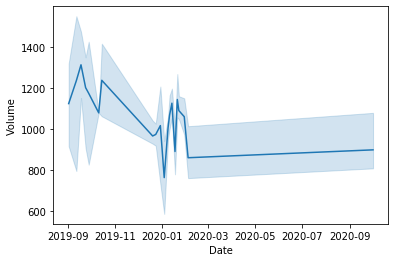

In [14]:
bench_press = df.loc['Barbell Bench Press']
sns.lineplot(x=bench_press['Date'], y=bench_press['Volume'])

In [15]:
def plot_exercise_stats(workout_df, exercise_name, color='red'):
    exercise = df.loc[exercise_name]
    fig, ax = plt.subplots()
    volume_plot = sns.lineplot(x=exercise['Date'], y=exercise['Volume'], label=exercise_name, color=color)
    plt.show()

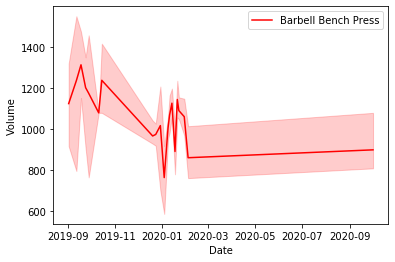

In [16]:
plot_exercise_stats(df, 'Barbell Bench Press')

In [17]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
random.choice(colors)

'faded green'

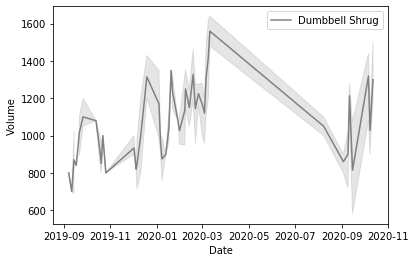

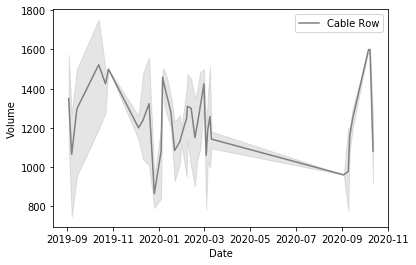

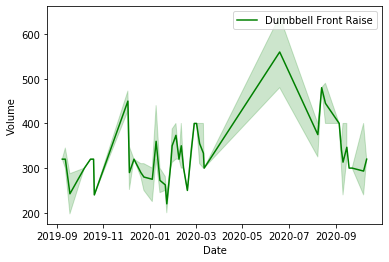

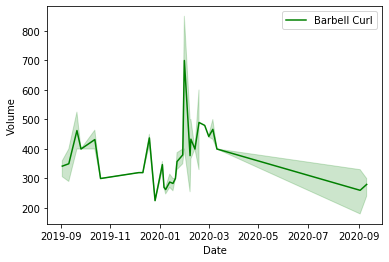

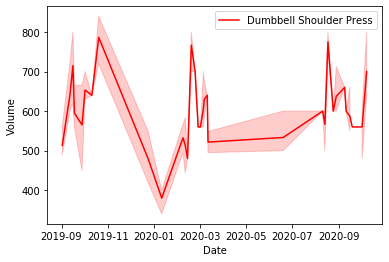

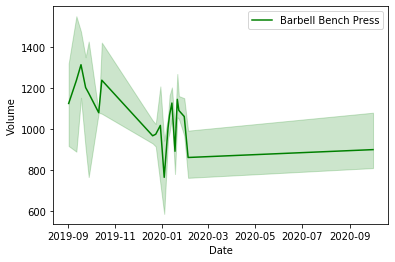

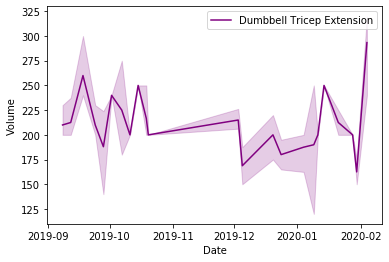

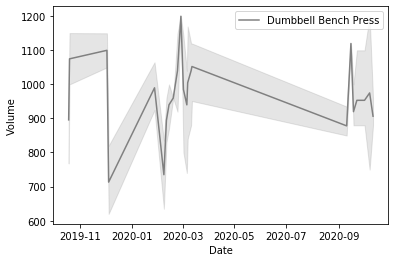

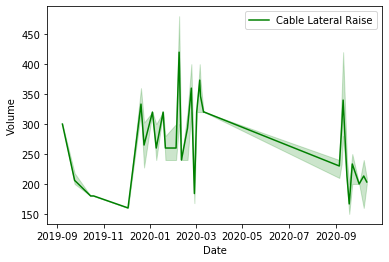

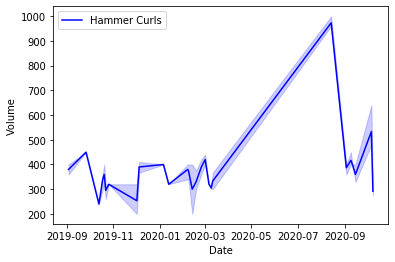

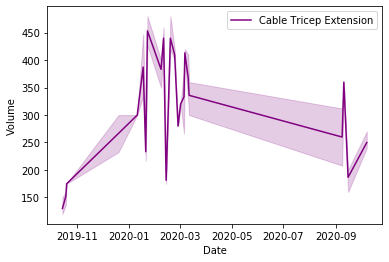

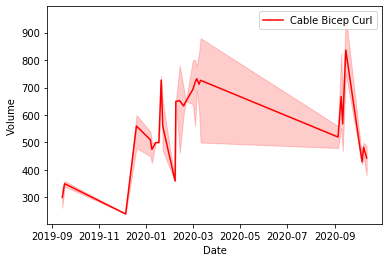

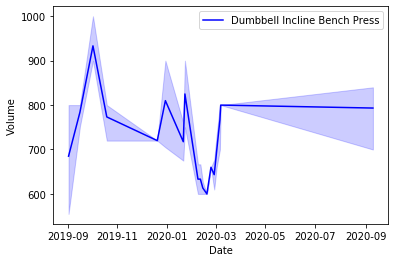

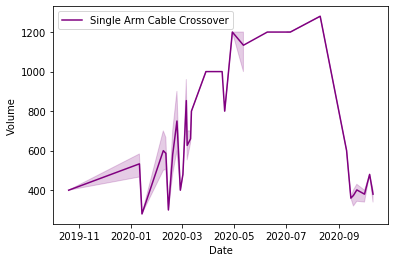

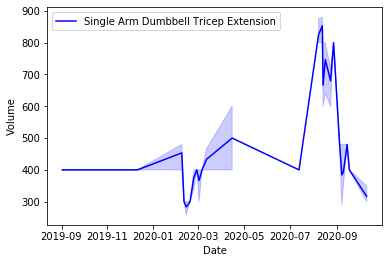

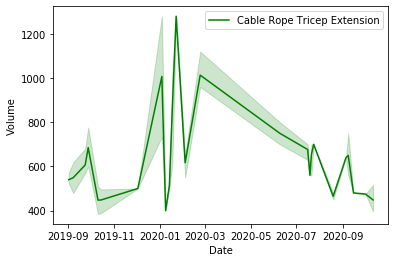

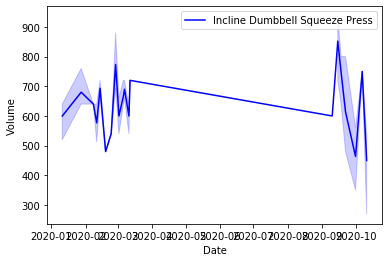

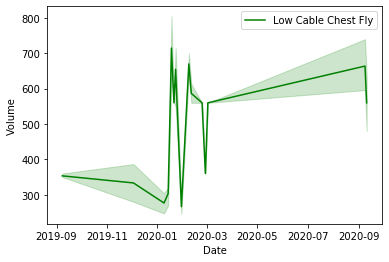

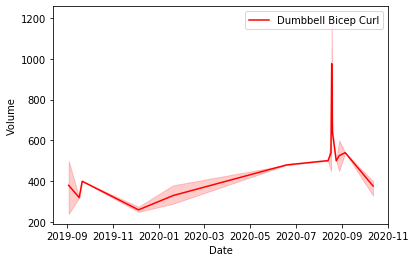

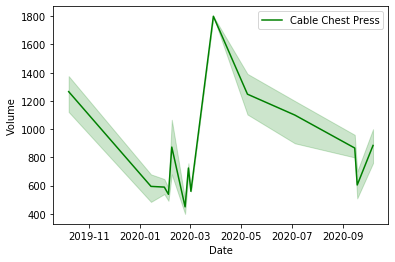

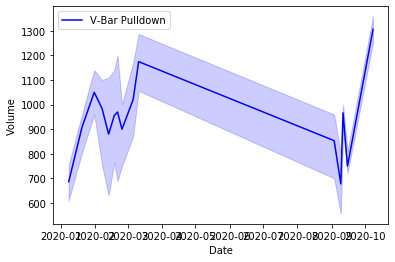

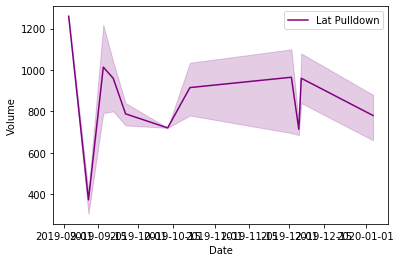

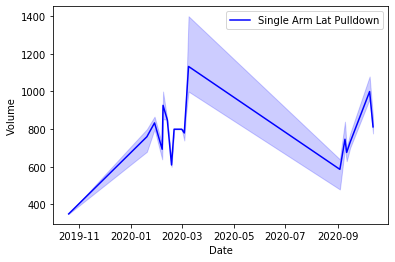

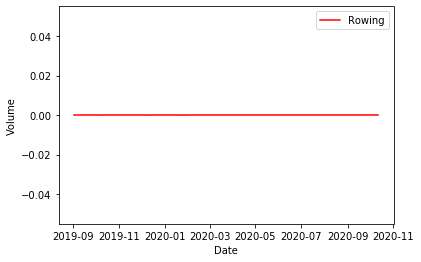

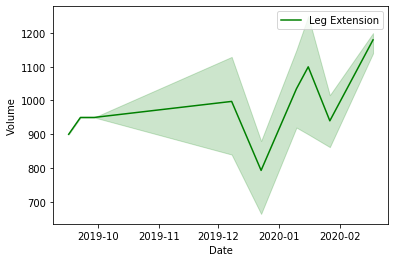

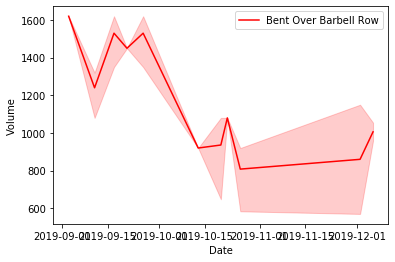

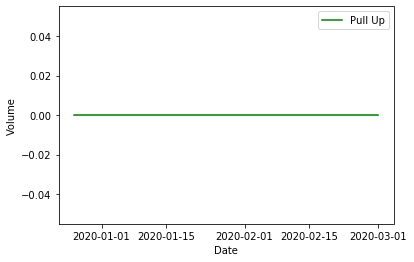

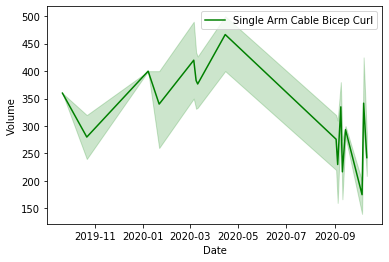

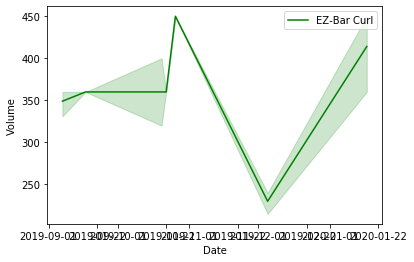

In [18]:
colors = ["blue", "red", "grey", "green", "purple"]
for name in exercises:
    plot_exercise_stats(df, name, color=random.choice(colors))

In [24]:
set(list(df.index))

{'Barbell Bench Press',
 'Barbell Curl',
 'Bent Over Barbell Row',
 'Cable Bicep Curl',
 'Cable Chest Press',
 'Cable Lateral Raise',
 'Cable Rope Tricep Extension',
 'Cable Row',
 'Cable Tricep Extension',
 'Dumbbell Bench Press',
 'Dumbbell Bicep Curl',
 'Dumbbell Front Raise',
 'Dumbbell Incline Bench Press',
 'Dumbbell Shoulder Press',
 'Dumbbell Shrug',
 'Dumbbell Tricep Extension',
 'EZ-Bar Curl',
 'Hammer Curls',
 'Incline Dumbbell Squeeze Press',
 'Lat Pulldown',
 'Leg Extension',
 'Low Cable Chest Fly',
 'Pull Up',
 'Rowing',
 'Single Arm Cable Bicep Curl',
 'Single Arm Cable Crossover',
 'Single Arm Dumbbell Tricep Extension',
 'Single Arm Lat Pulldown',
 'V-Bar Pulldown'}

In [25]:
df.to_csv('excercise_df.csv')